# Algorytmika i matematyka uczenia maszynowego 
## Laboratorium 6





Z [Wikipedii](https://pl.wikipedia.org/wiki/Paradoks_Monty%E2%80%99ego_Halla):

> Zawodnik stoi przed trzema zasłoniętymi bramkami. Za jedną z nich (za którą – wie to tylko prowadzący program) jest nagroda (umieszczana całkowicie losowo). Gracz wybiera jedną z bramek. Prowadzący program odsłania inną bramkę (co istotne – anonsując, że jest to bramka pusta), po czym proponuje graczowi zmianę wyboru. <br /><br />
Intuicyjnie nie ma znaczenia, czy zawodnik pozostanie przy swoim wyborze, czy nie. Okazuje się jednak, że jest inaczej. Przy wyborze strategii pozostawania przy swoim pierwszym wyborze prawdopodobieństwo wygranej wynosi 1/3. Natomiast przy wyborze „strategii zmiany” wynosi 2/3. <br /><br />
Oznacza to, że zawodnikowi opłaci się zmienić bramkę, ponieważ ma wtedy dwa razy większe szanse na wygraną. Paradoks wynika z niedocenienia informacji, jaką „między wierszami” przekazuje prowadzący. Informacją tą jest wskazanie pustej bramki. <br /><br />
Innymi słowy poprzez otwarcie jednej z pustych bramek prowadzący zmniejsza liczność zbioru „pustych bramek”, a w rezultacie prawdopodobieństwo przegranej z 2/3 do 1/3. „Pozostałe” prawdopodobieństwo wygranej musi wynosić więc obecnie 2/3.

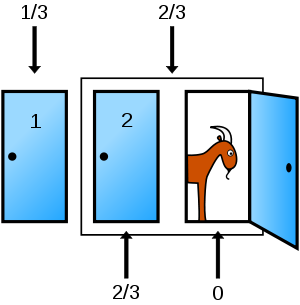






Zaimplementuj symulację paradoksu Monty'ego Halla. Przeprowadź eksperyment losowy, w którym gra zostanie rozegrana określoną liczbę razy (liczbę rozgrywek należy ustawić jako parametr programu).

### Zadanie 1

Symulację należy przeprowadzić w dwóch wariantach:

1. Gracz zawsze zostaje przy pierwotnie wybranej bramce.
2. Gracz zawsze zmienia swój wybór po tym, jak prowadzący ujawni jedną z bramek bez nagrody.

Po zakończeniu symulacji porównaj skuteczność obu strategii.

Odpowiedz na pytanie: **Czy uzyskane wyniki są zgodne z teorią paradoksu Monty'ego Halla?**





In [100]:
import numpy as np
import random

def Game(doors_number, chosen_door, change_door):
    #Phase 1
    doors_in_game = [i for i in range(doors_number)]
    reward_id = np.random.randint(0,doors_number,1).item()
    
    #Phase 2 (removing all doors besides: chosen by player, with reward)
    
    doors_to_remove = doors_in_game.copy()
    #Remove reward_id door and door chosen by player
    
    doors_to_remove = [d for d in doors_to_remove if d not in [reward_id,chosen_door]]
    doors_to_remove = [random.choice(doors_to_remove)]
    
    doors_in_game = [d for d in doors_in_game if d not in doors_to_remove]
    
    #Check if we have 2 doors left (player could by chance pick the correct door)
    if len(doors_in_game) == 1:
        idx = np.random.randint(0,len(doors_to_remove),1).item()
        random_door = doors_to_remove[idx]
        doors_in_game.append(random_door)
    
    
    doors_in_game.sort()

    #Change or do not change doors
    if change_door:
        chosen_door = [d for d in doors_in_game if d not in [chosen_door]]
        chosen_door = chosen_door[0]
    
    if chosen_door == reward_id:
        won = True
    else:
        won = False

    return won
        
        
        




In [102]:
#Scenerio without changing doors:
n = 10000
doors_n = 3
chosen_door = 0

s_victories = 0
for i in range(n):
    won = Game(doors_number = doors_n, chosen_door = chosen_door, change_door = False)
    if won:
        s_victories+=1
        
Stay_win_ratio = s_victories/n


#Scenerio without changing doors:

c_victories = 0
for i in range(n):
    won = Game(doors_number = doors_n, chosen_door = chosen_door, change_door = True)
    if won:
        c_victories+=1
        
Change_win_ratio = c_victories/n

print(f"Game repeated {n} times:")
print(f"Amount of doors in the game {doors_n}\n")
print("Win ratio for always staying with the same door: ", Stay_win_ratio)
print("Win ratio for always changing door: ", Change_win_ratio)

Game repeated 10000 times:
Amount of doors in the game 3

Win ratio for always staying with the same door:  0.345
Win ratio for always changing door:  0.6756


#### Zadanie 2

Napisz program, który umożliwia przeprowadzenie symulacji paradoksu Monty'ego Halla z dowolną liczbą bramek (możliwość podania tej liczby jako parametr).

Zasady symulacji:

* Gracz losowo wybiera jedną z $N$ bramek.
* Prowadzący odsłania jedną z pozostałych $N - 1$ bramek, za którą na pewno nie ma nagrody.
* Gracz następnie losowo wybiera jedną z pozostałych $N - 2$ bramek (innych niż pierwotny wybór oraz bramka odsłonięta przez prowadzącego).

W przypadku $N = 100$ gracz wybiera jedną ze 100 bramek, prowadzący odsłania jedną (w której nie ma nagrody) z 99 pozostałych, a następnie gracz wybiera losowo jedną z 98 bramek.

Na koniec porównaj skuteczność strategii "pozostania przy wyborze" oraz "zmiany wyboru" (losowej zmiany wśród dostępnych opcji).



In [103]:
#Scenerio without changing doors:
n = 10000
doors_n = 100
chosen_door = 0

s_victories = 0
for i in range(n):
    won = Game(doors_number = doors_n, chosen_door = chosen_door, change_door = False)
    if won:
        s_victories+=1
        
Stay_win_ratio = s_victories/n


#Scenerio without changing doors:

c_victories = 0
for i in range(n):
    won = Game(doors_number = doors_n, chosen_door = chosen_door, change_door = True)
    if won:
        c_victories+=1
        
Change_win_ratio = c_victories/n

print(f"Game repeated {n} times:")
print(f"Amount of doors in the game {doors_n}\n")
print("Win ratio for always staying with the same door: ", Stay_win_ratio)
print("Win ratio for always changing door: ", Change_win_ratio)

Game repeated 10000 times:
Amount of doors in the game 100

Win ratio for always staying with the same door:  0.0091
Win ratio for always changing door:  0.0108


#### Zadanie 3

Przeanalizuj, jak liczba bramek wpływa na prawdopodobieństwo wygranej w każdej ze strategii. Wyświetl wykres przedstawiający prawdopodobieństwo wygranej w zależności od liczby bramek dla obu strategii (jako dwie serie danych).

In [104]:
d_list = np.arange(3,51,1).tolist()
n_games = 1000
stay_win_ratio = []
change_win_ratio = []

#Stay scenario
for d_number in d_list:
    victories = 0
    for i in range(n_games):
        won = Game(doors_number = d_number, chosen_door = 0, change_door = False)
        if won:
            victories+=1
                
    win_ratio = victories/n_games
    stay_win_ratio.append(win_ratio)
    
#Stay scenario
for d_number in d_list:
    victories = 0
    for i in range(n_games):
        won = Game(doors_number = d_number, chosen_door = 0, change_door = True)
        if won:
            victories+=1
                
    win_ratio = victories/n_games
    change_win_ratio.append(win_ratio)   

Text(0, 0.5, 'Win-Ratio')

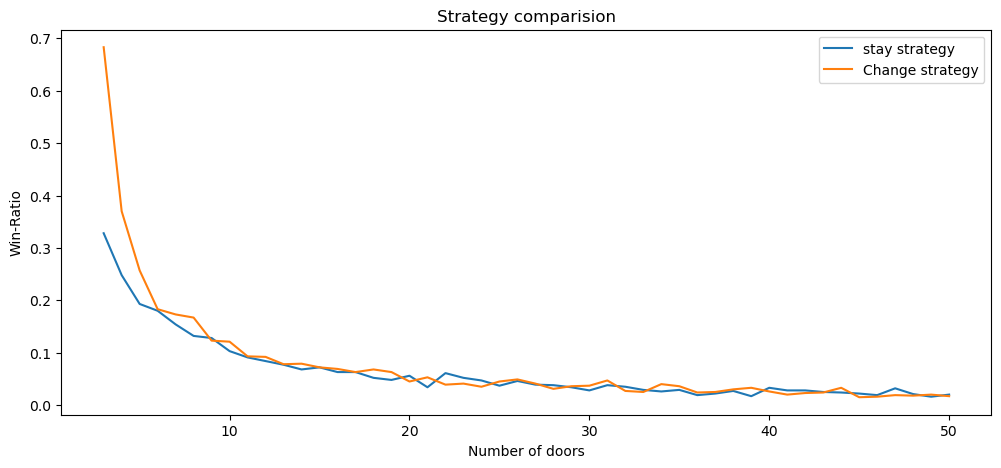

In [107]:
import matplotlib.pyplot as plt

plt.figure(figsize = (12,5))


plt.plot(d_list, stay_win_ratio, label = "stay strategy")
plt.plot(d_list, change_win_ratio, label = "Change strategy")

plt.legend()
plt.title("Strategy comparision")
plt.xlabel("Number of doors")
plt.ylabel("Win-Ratio")


